<sub>Aung Si</sub><br>
<sub>July 18<sup>th</sup>, 2023</sub>

# <center>Statistical Aribtrage: Theory to Model</center>
### <center>An explicit but partial implementation of <i>Statistical Arbitrage in the U.S. Equities Market (2008)</i> by Marco Avellaneda and Jeong-Hyun Lee.</center>

---

## <center>Part I: Principal Components Analysis, Eigenportfolios, and Multi-factor Regressions</center>
<center><i><sub>Part I of this notebook explores the building blocks of a standard statistical arbitrage model based on a Principal Component Analysis of S&P 500 constituents. It explores the theory behind the Principal Components Analysis procedure and ends with the construction of the principal eigenportfolio and the computation of its returns. The arbitrage model and the backtest is built in Part II of the notebook.</sub></i></center>

### <center>PCA In a Nutshell</center>
Principal Components Analysis, or PCA, is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables known as principal components. The first component (an eigenvector) explains the largest amount of variance within the dataset, the second explains the second largest amount of variance, and so forth. 

Said differently, PCA is like organizing a cluttered room: you'd start by grouping the largest, most noticeable items (akin to the first principal component that captures the largest variance), then smaller items grouped by similarity (subsequent principal components), ultimately creating a tidier space where the contents are easier to understand and navigate.

### <center>Principal Components of the Stock Market</center>
In the context of the stock market or an index like the S&P 500, we can use the prices of the constituents to compute their daily return, standardize the dataset, then decompose it into its principal components with PCA. In this way, PCA is a useful tool in the identification of underlying patterns that move the market; the first component might represent a broad market trend affecting all stocks, and each successive component might reveal a less dominant yet distinct pattern. 

### <center>Eigenvectors</center>
Each of these trends/components is an eigenvector, and in them we find coefficients, $v_i$, that tell us how much a given stock contributes to the variance explained by the eigenvector. The sign of the coefficient also gives us insight as to the directionality of the stock to that eigenvector: if the sign of a coefficient of a corresponding stock is negative, then it suggests that the stock moves against the trend depicted by the eigenvector, and vice versa.

This also gives investors insight into positioning—we can, say, short the stocks moving counter to the trend, and long those moving with the trend (this would be a bet on the continuation of market forces as depicted by the eigenvector), or we could do the opposite, in which case we bet on the market forces essentially reversing in regime. The dominant eigenvector is unique in that $v_{i} > 0$ —as we move further along the eigenvectors, this may no longer hold true, suggesting more orthogonal market trends. To get the position sizes of the investments, however, we need to look beyond just the coefficients.

### <center>Eigenportfolios</center>
Eigenportfolios represent an useful application of PCA in financial markets, serving to help us break down market behavior more granularly. Each portfolio aligns with a distinct principal component, thus capturing a unique aspect of the market's behavior. The 'eigenportfolio' corresponding to the first principal component, for instance, would represent the direction in which the data varies the most, often capturing the market's overall movement. These portfolios are thus derived from the eigenvectors we obtained from our PCA. The weights ($Q_i$) for each stock in an eigenportfolio are determined by the coefficients ($v_i$) in the corresponding eigenvector *adjusted for the volatility of each stock* ($\sigma_i$). In other words, the formula

$$Q^{(j)}_i = \frac{v^{(j)}_i}{\bar{\sigma}_i}\quad\text{,}\quad j=1, 2,...,m\text{,} \tag{1}$$

where $v^{(j)}_i$ is the $i^{\text{th}}$ eigenvector coefficient within the $j^\text{th}$ eigenvector, $\sigma_i$ is stock $i$'s standard deviation, and $m$ is our chosen number of eigenvectors, gives us the weights of an eigenportfolio.

The weights of the stocks in an eigenportfolio are therefore inversely proportional to their volatility (i.e., our position sizes are smaller for more volatile stocks), a method reminiscent of cap-weighted indices where larger capitalization companies often have smaller volatilities. This, combined with the sign of the coefficients, tell us that we can change our positioning based on the sign of the coefficients, and ultimately allows us to interpret the eigenportfolios as inherently “pairs-trading” or, more generally, long-short positions—note here that the dominant eigenvector will yield an eigenportfolio, the principal eigenportfolio, comprising all-long/all-short positions, but in the context of market indices or ETFs, the principal eigenportfolio is an all-long portfolio given its approximation of the index at large (Avellaneda & Lee, 2008, pp. 10-11).*

### <center>The Principal Eigenportfolio</center>

The principal eigenportfolio is simply the eigenportfolio associated with the first principal component. The significance of the principal eigenportfolio extends beyond its numerical representation—its dominance in explaining the variance of the data makes it a strong proxy to the broader market. For example, the principal eigenportfolio derived from the correlation matrix of the S&P 500 constituents approximates the S&P 500 index to large degree, making it a valuable tool for investors to gauge the market’s direction and intensity, acting as a barometer of overall market sentiment. This 'market factor' can form the foundation for strategic asset allocation decisions, as we will explore in end portion of this notebook.

### <center>Idiosyncratic Returns and Multi-factor Models</center>

Naturally, the question arises as to the necessity of PCA and why we simply can't use some other proxy, say, price data for the SPY ETF, to approximate the S&P 500 index in place of eigenportfolios. We absolutely can, but in doing so we would limit ourselves to univariate regression models. Our arbitrage model, which seeks to trade the behavior of a stock's return uncorrelated to the market so as to remain market-neutral, is founded upon linear regression, and thus how we set up the regression becomes instrumental to its profitability. 

A simple regression model tells us that the return of any of SPY's constituents can be represented by:

$$R_{i} = \beta_{i}R_{\text{SPY}} + \tilde{R}_i,$$

or more generally,

$$R_{i} = \beta_{i} F + \tilde{R}_i, \tag{2}$$

where $\beta_{i}R_{\text{SPY}}$ represents the systematic component of the stock's return explained by SPY's returns, and $\tilde{R}_i$ represents an idiosyncratic component not explained, and uncorrelated, to SPY's returns. This is a single-factor model where the factor is SPY's returns, comparable to single-factor model where the factor is the returns of the principal eigenportfolio.

While the above model is powerful in its own right, we lose information on the level of inner market dynamics, as we reduce the whole of the S&P 500 comprised of 500 unique but correlated consituents, down to a single entity, SPY. PCA solves this limitation to a great degree. By decomposing all 500 constituents into a specified $m$ number of eigenvectors, we have $m$ factors that each attempt to explain the systematic component of $R_{i}$, which allows more precision in our estimate of the idiosyncratic portion:

$$R_{i} = \sum^m_{j=1}\beta_{ij}F_{j} + \tilde{R}_i, \tag{3}$$

where $F_j$ is the return of an eigenportfolio $j$. In this way, PCA helps to make more precise our estimation of the systematic component of a stock's return as well as the idiosyncratic portion. The latter serves as the foundation of how we implement our arbitrage model, which I will explore more deeply in Part II.

<sub><i>*Note that the interpretation of postion and position size based on the eigenportfolios is not an inherent property of a PCA decomposition, but rather an attribution of economic and investment principles upon its results, and specific strategies derived from these interpretations are subject to change depending on the investor's appetite. Read more on PCA [here](https://stats.stackexchange.com/questions/266652/why-are-pca-eigenvectors-orthogonal-and-what-is-the-relation-to-the-pca-scores-b).</i></sub>

## <center>Implentation</center>

### <center>Imports</center>

The crux of this analysis is the PCA decomposition; to conduct PCA, we import the `PCA` class from `scikit-learn`'s `decomposition` module.

In [23]:
import Omega as o
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import project_functions as pf
import random

from sklearn.decomposition import PCA # For PCA decomposition.

o.mpl_cast('white')

### <center>Setting the Timeframe for Analysis</center>

I arbitrarily choose a timeframe that goes a year back from today. I also retrieve price data for the SPY ETF to compare its growth curve with that of the principal eigenportfolio later on. The PCA decomposition is done on a cross-section of $n=100$ stocks from within the S&P 500 universe. Given the assumption of linearity within the data inherent to a PCA decomposition, we need to first compute the returns of the stocks, to convert an otherwise non-stationary price series into stationary, comparable values.

In [24]:
# 1. Fetch data for S&P 500 tickers and SPY ETF for comparison.

start = '2022-07-16'
end = '2023-07-16'

random.seed(8)

snp_tickers = random.sample(o.get_snp(), 100)
snp_prices = o.Ticker(snp_tickers).bulk_prices(start, end) 
snp_returns = snp_prices.pct_change()[1:] # Compute returns.

spy_prices = o.Ticker('SPY').get_prices(start, end)

[*********************100%***********************]  100 of 100 completed

1 Failed download:
- BF.B: No data found for this date range, symbol may be delisted


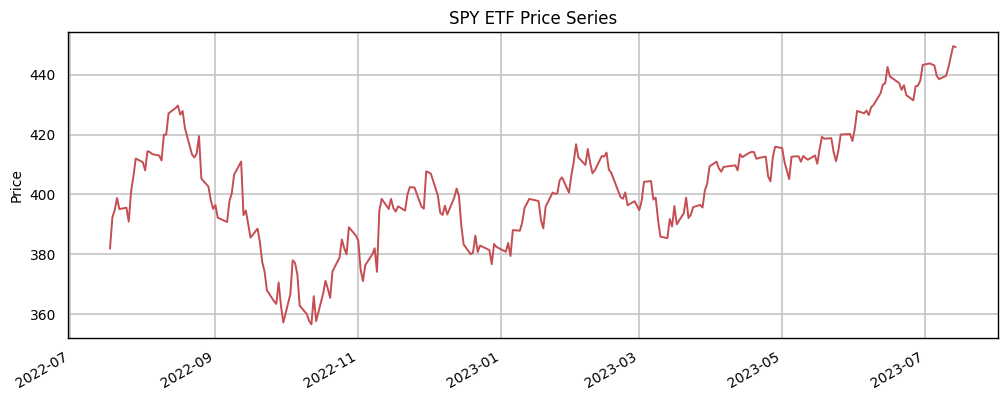

In [25]:
# 1a. Plot SPY prices.

spy_prices.plot(legend=False, figsize=(12, 4.5), linewidth=1.4, color='#C44E52')
plt.title('SPY ETF Price Series')
plt.ylabel('Price'); plt.xlabel('');

### <center>Principal Component Analysis</center>

We now need to standardize our returns dataset. PCA, being a variance-maximizing exercise, could otherwise be biased towards variables with higher variance, thus standardizing the data prevents such scale-dependent results:

$$\hat{R}_{i} = \frac{R_{i} - \bar{R}_{i}}{\sigma_{R_{i}}} \tag{4}$$

Here, we also set the number of components, $m$, we want `PCA` to reduce our dataset to. In our case, we choose $m=15$ components, which Avellaneda and Lee found to be optimal for the eventual arbitrage model. In practice, however, it's best to verify this through rigorous testing as did the authors. 

The `fit` method then applies PCA, computing the eigenvectors.

<sub><i>Note that the authors ranked each eigenvector in descending order with respect to the proportion of explained variance reflected in each, but the `PCA` class does this for us automatically.</i></sub>

In [26]:
# 2. Conduct Principal Component Analysis on the standardized data.

n_components = 15 # As per Avellaneda and Lee's findings.
stdized_snp_returns = (snp_returns - snp_returns.mean()) / snp_returns.std()
pca = PCA(n_components=n_components)
pca.fit(stdized_snp_returns);

Proportion of variance explained by the principal eigenvector: 0.39


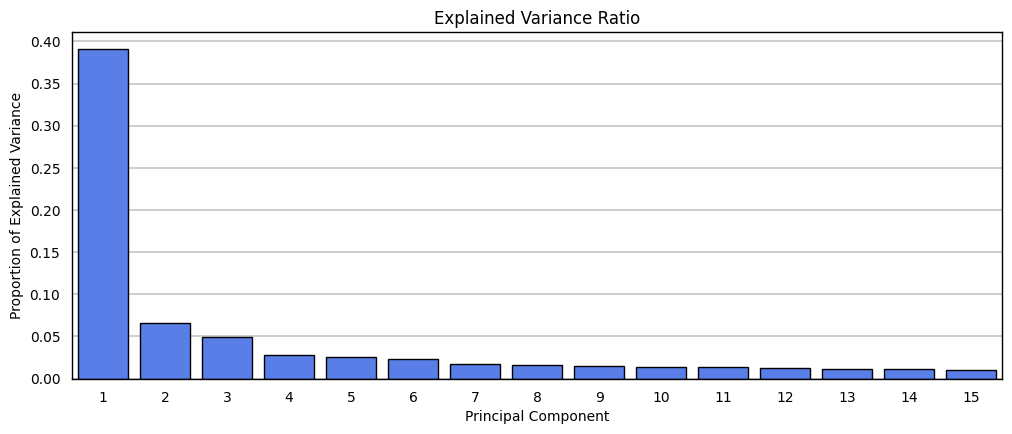

In [27]:
# 2a. Plot each principal component's proportion of explained variance.

evr = pca.explained_variance_ratio_
print(f'Proportion of variance explained by the principal eigenvector: {evr[0]:,.2f}')

plt.figure(figsize=(12, 4.5))
sns.barplot(x=np.arange(1, len(evr)+1), y=evr, color='#4273FF', edgecolor='k')
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Component'); plt.ylabel('Proportion of Explained Variance');

In the above plot we see that the first principal component explains about 39% of the total variance within our returns dataset. The second eigenvector explains a significantly less proportion of the variance. Each eigenvector is orthogonal to each other as PCA attempts to minimize the correlation between each eigenvector.

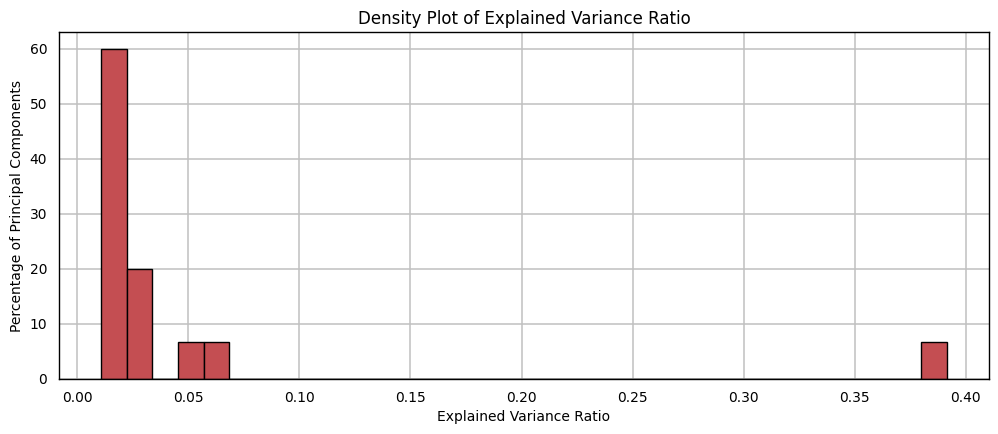

In [28]:
# 2b. Plot density of explained variance ratios.

plt.figure(figsize=(12,4.5))
sns.histplot(evr, alpha=1, color="#C44E52", stat='percent')
plt.title('Density Plot of Explained Variance Ratio')
plt.xlabel('Explained Variance Ratio'); plt.ylabel('Percentage of Principal Components');

The dominent component can be seen in isolation on the far right, explaining the greatest proportion of variance within the returns dataset.

### <center>Constructing Eigenportfolios</center>

We can retrieve the eigenvectors (pre-sorted) from the fitted `PCA` instance through its `components_` attribute. We can then transform these eigenvectors into eigenportfolios as per $(1)$:

In [29]:
# 3. Compute raw eigenportfolios from PCA components and stock returns.
# 3a. Normalize the raw eigenportfolios so that the weights sum up to 1, then compute the eigenportfolios.

def get_eigenportfolios(pca, snp_returns):
    eigenvectors = pca.components_ # Retrieve eigenvectors from PCA object
    returns_std = snp_returns.std().values
    weights_vol_adj = eigenvectors / returns_std
    return eigenvectors, weights_vol_adj

eigenvectors, eigenportfolios = get_eigenportfolios(pca, snp_returns)
eigenvectors_df, eigenportfolios_df = pf.to_df(eigenvectors, eigenportfolios, snp_returns)
principal_eigenportfolio = eigenportfolios_df.iloc[0]; mth_eigenportfolio = eigenportfolios_df.iloc[-1]

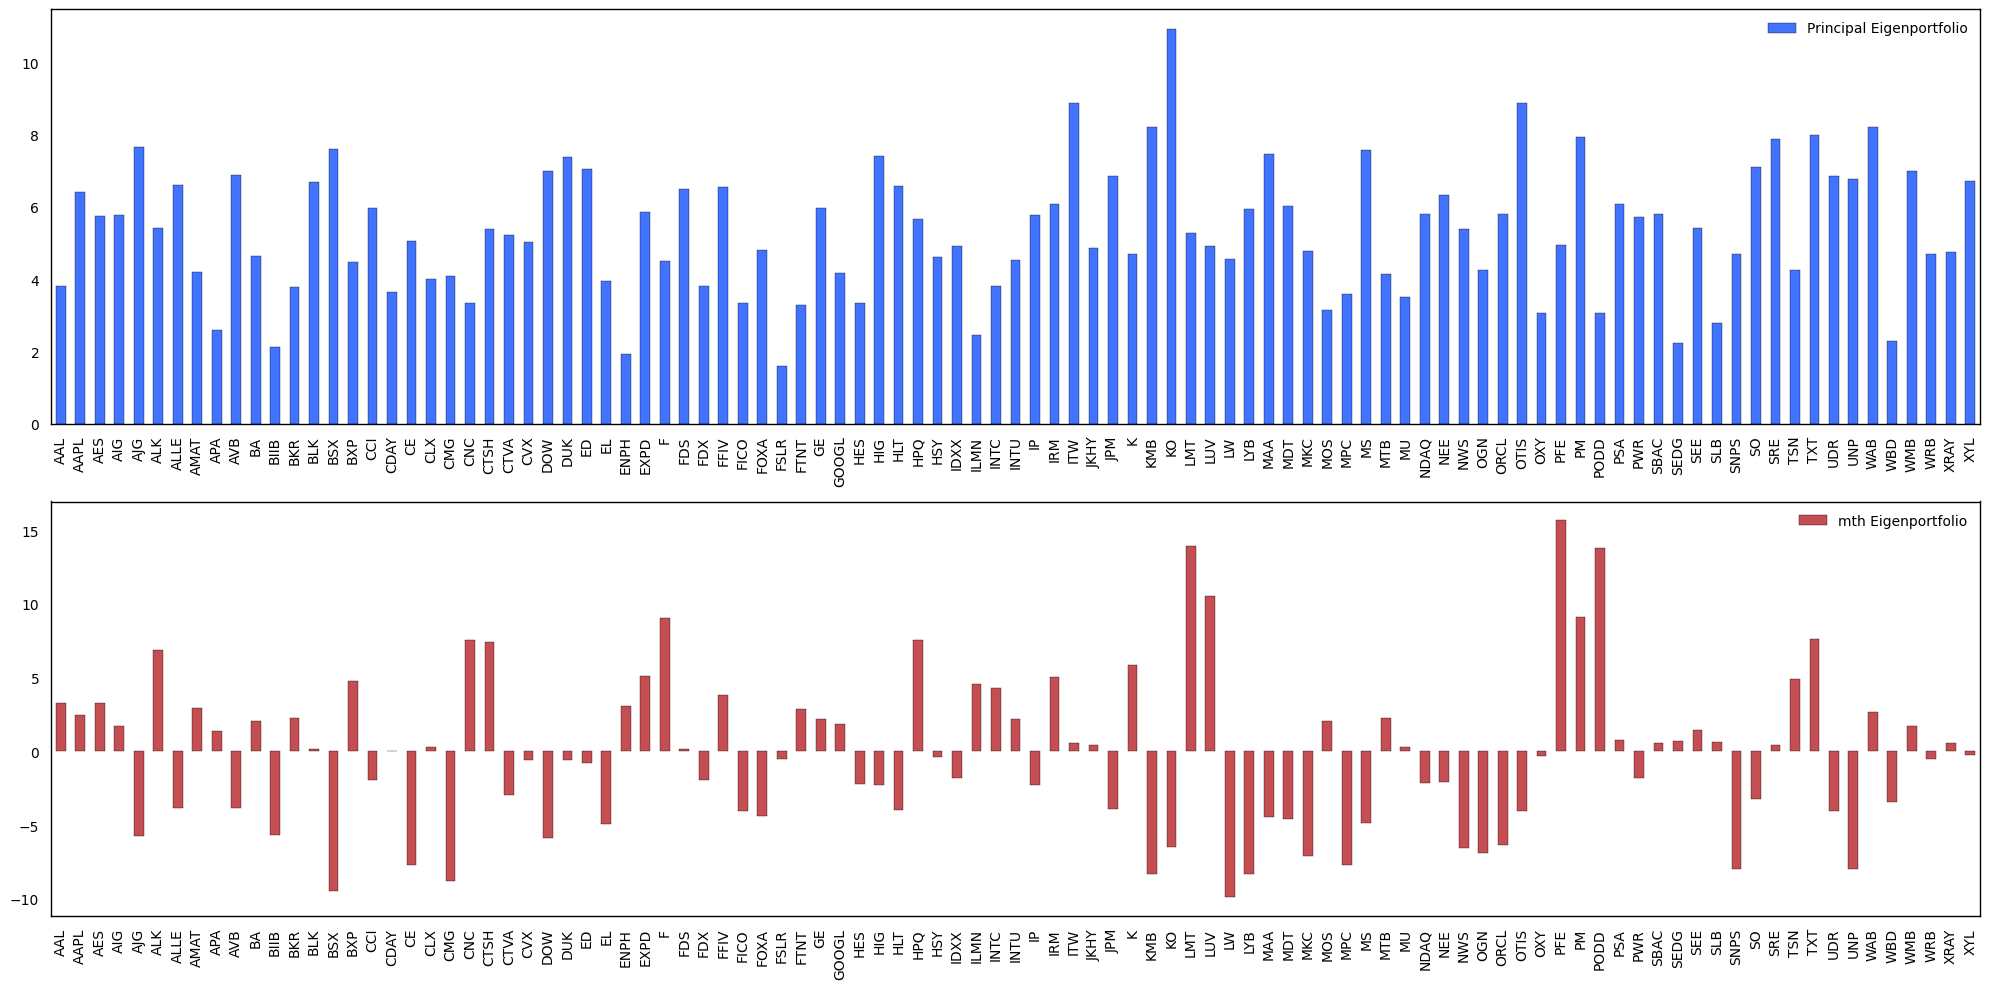

In [30]:
# 3b. Plot weights of principal eigenportfolio and mth eigenportfolio.

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))
principal_eigenportfolio.plot.bar(ax=axes[0], color='#4273FF', edgecolor='k', linewidth=.25)
axes[0].grid(False); axes[0].legend(['Principal Eigenportfolio'])
mth_eigenportfolio.plot.bar(ax=axes[1], color='#C44E52', edgecolor='k', linewidth=.25)
axes[1].grid(False); axes[1].legend(['mth Eigenportfolio'])
plt.tight_layout();

The above plot shows us the all-long nature of the principal eigenportfolio. The $m^{th}$ eigenportfolio is a far cry from the principal eigenportfolio - as each eigenvector is orthogonal to each other, this makes sense.

### <center>Computing Eigenportfolio Returns</center>

Using the weights obtained above we can now compute the returns of each eigenportfolio through the following equation:

$$F_{j} = \sum^{n}_{i=1}Q^{(j)}_{i}R_{i} \quad\text{,}\quad j=1,2,...,m\tag{5}$$

In [33]:
# 4. Compute the returns of each eigenportfolio.

def get_eigenportfolio_returns(eigenportfolios, snp_prices):
    ep_returns =  ((eigenportfolios @ snp_prices.T).T).pct_change()[1:]
    col_map = {col: f"EP{col+1}" for col in ep_returns.columns}
    return ep_returns.rename(columns=col_map).rename(columns={'EP1': 'PrEP'})

eigenportfolio_returns = get_eigenportfolio_returns(eigenportfolios, snp_prices)
eigenportfolio_returns.head()

,PrEP,EP2,EP3,EP4,EP5,EP6,EP7,EP8,EP9,EP10,EP11,EP12,EP13,EP14,EP15
Date,,,,,,,,,,,,,,,
2022-07-19 00:00:00,0.029529,0.007361,0.189672,-0.014570,0.028442,0.041356,0.019560,-0.019205,0.027941,0.006953,0.009309,0.016492,0.030094,0.005505,0.028040
2022-07-20 00:00:00,0.006261,-0.007988,0.196318,-0.015699,0.030467,0.079956,0.012929,0.024770,0.014512,0.012890,0.018525,0.009634,0.043464,-0.097703,0.006452
2022-07-21 00:00:00,0.009561,0.017499,0.081424,-0.003527,0.016416,-0.006543,0.037121,-0.019302,0.015360,-0.027877,-0.023098,-0.003338,0.016442,-0.047136,-0.006097
2022-07-22 00:00:00,-0.004092,0.008604,-0.092355,-0.009489,-0.017785,-0.035255,-0.008840,-0.015901,-0.031989,0.019367,-0.019613,-0.033583,0.005217,0.060656,-0.005304
2022-07-25 00:00:00,0.001960,-0.005848,-0.170570,-0.048421,-0.003439,0.067460,-0.024424,-0.004696,0.057018,0.044366,-0.017429,-0.012779,-0.015487,-0.054562,-0.012731


Correlation between SPY ETF returns and Principal Eigen Portfolio returns: 0.92


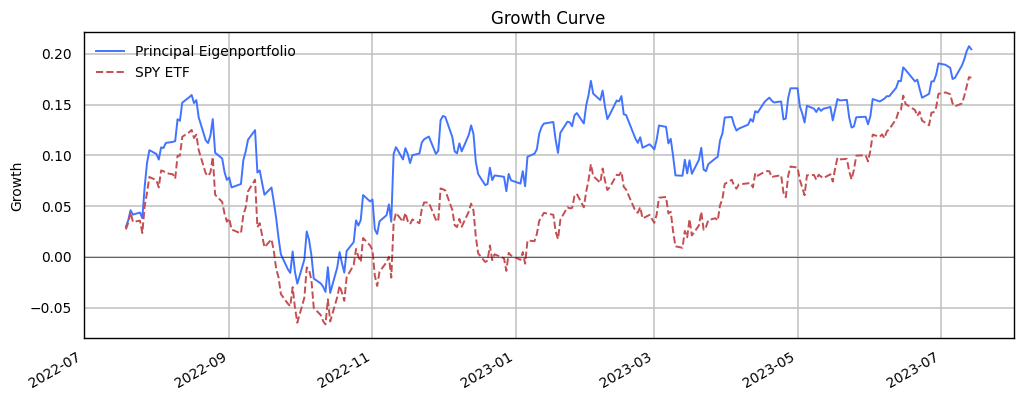

In [32]:
# 5. Plot the growth of the first eigenportfolio in tandem with that of the SPY ETF.
# =========================================================================================================

def get_growth(eigenportfolio_returns, spy_prices):
    principal_eigenportfolio_returns = eigenportfolio_returns['PrEP']
    principal_eigenportfolio_growth = (1 + principal_eigenportfolio_returns).cumprod() - 1
    spy_growth = (1 + spy_prices.pct_change()[1:]).cumprod() - 1
    return principal_eigenportfolio_growth, spy_growth

def plot_comparative_growth(principal_eigenportfolio_growth, spy_growth, color='#4273FF'):
    plot = principal_eigenportfolio_growth.plot(color=color, linewidth=1.4)
    spy_growth.plot(ax=plot, linestyle='dashed', linewidth=1.4)
    plt.axhline(y=0, color='k', linewidth=.5, alpha=.75)
    plt.title('Growth Curve'); plt.legend(['Principal Eigenportfolio', 'SPY ETF'])
    plt.xlabel(''); plt.ylabel('Growth')

principal_eigenportfolio_growth, \
spy_growth = get_growth(eigenportfolio_returns, spy_prices)

corr_spy_pr_ep = spy_growth.squeeze().corr(principal_eigenportfolio_growth.squeeze())

plt.figure(figsize=(12, 4.5))
plot_comparative_growth(principal_eigenportfolio_growth, spy_growth)
print(f'Correlation between SPY ETF returns and Principal Eigen Portfolio returns: {corr_spy_pr_ep:,.2f}')

The above plot shows that the behaviors of the principal eigenportfolio and the SPY ETF are very similar, which is a testament to the large variance capture of the principal eigenportfolio with respect to the broader S&P 500. We can also see their similarity in the strong, positive correlation between the two, where $\rho \approx 0.92$.

## <center>Teeing it up for Arbitrage: Eigenportfolio Returns as Factors</center>
Eigenportfolio returns paint a multifaceted picture of the economic landscape. Early eigenportfolios generally encapsulate broad economic trends impacting a vast majority of stocks, while later ones often illuminate sector-specific patterns. The return of the primary eigenportfolio plays a pivotal role, unmasking the primary trends driving stock performance. Simultaneously, these factors highlight the idiosyncratic returns, $\tilde{R_{i}}$, unique to each stock and not influenced by systematic factors. These idiosyncratic returns are computed using equation $(2)$.

In the context of investing, these factors offer valuable insights that can guide portfolio formation in line with overarching market trends. This empowers investors to customize their exposure to each factor, aligning with their risk tolerance, market predictions, and investment objectives. Furthermore, these factors help investors detect potential pricing inconsistencies so as to reveal arbitrage opportunities when a stock's price deviates from its intrinsic value (as suggested by the regression). These factors thus serve a dual purpose: they assist in interpreting market trends <i>and</i> lay the groundwork for potential arbitrage transactions. They evolve beyond their theoretical constructs, becoming practical tools for predicting market shifts and identifying arbitrage opportunities. Our forthcoming discussion will delve deeper into an arbitrage strategy crafted around these principles.

---

## <center>Citations</center>

* Avellaneda, Marco, and Jeong-Hyun Lee. "Statistical Arbitrage in the U.S. Equities Market." New York University, 2008, https://math.nyu.edu/~avellane/AvellanedaLeeStatArb071108.pdf.